# Guided Project: Star Wars Survey

## Introduction

While waiting for _Star Wars: The Force Awakens_ to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com) became interested in answering some questions about Star Wars fan. In particular, they wondered: does the rest of America realize that _The Empire Strikes Back_ is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which we will download from their GitHub repository.

For this project, we will be cleaning and exploring the data set to gain insights on the data and answer two main questions:
        * Which episode is the most viewed?
        * Which episode is ranked the highest?

### Summary

After cleaning the data set and analysing the data, we were able to make the following conclusions:
* Episodes 5, 6 and 1 are the most viewed episodes (in decreasing order)
* Episodes 3, 2 and 1 are ranked as the best 3 episodes of the saga (in decreasing order)

## Data Import

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

## Initial Data Exploration

Let's check the first few rows of the data set to familiarize with it.

In [16]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We also print the columns information for more insights.

In [17]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

<ins>Observations</ins>:
- The data has several columns, including:
    * `RespondentID` - An anonymised ID for the respondent (person taking the survey)
    * `Gender` - The respondent's gender
    * `Age` - The respondent's age
    * `Household Income` - The respondent's income
    * `Education` - The respondent's education level
    * `Location (Census Region)` - The respondent's location
    * `Have you seen any of the 6 films in the Star Wars franchise?` - Has a `Yes` or `No` response
    * `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a `Yes` or `No` response


- The `RespondentID` is supposed to be a unique ID for each respondent. This column features one null value, that will thus need to be removed.


- The columns `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` both represent Yes/No questions. They can also feature NaN values where a respondent chose not to answer a question. These data would be easier to analyse with booleans. We address the conversion in the cleaning section.


- The next six columns (index 3 to 9) represent a single checkbox question.  The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`. These columns contain string type data representing the name of the episodes or NaN values. These columns may need to be converted to booleans as well for ease of use.


- The next six columns of the dataframe (index 9 to 15) ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns contain the value 1, 2, 3, 4, 5, 6 or NaN, but are stored as string type. A conversion to numeric type will be needed.

In the next section, we address these cleaning tasks.

## Data Cleaning

### Removing rows with null Respondent ID

We start by removing the rows for which the `RespondentID` value is null.

In [18]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

As seen in the previous section, only one row featured a null `RespondentID` value.
We check the shape of the data frame to verify the filtering is correct.

In [19]:
star_wars.shape

(1186, 38)

The dataframe was shortened of one row. The filtering is correct.

### Converting Yes/No answers to Booleans

In this section, we want to convert the `Yes` and `No` values contained in the `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` columns to booleans.

Both columns are currently of string type, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`.
Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

We first start by confirming the unique values present in both columns.

In [43]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [44]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The `Have you seen any of the 6 films in the Star Wars franchise?` column contains only `Yes` and `No` string values.

The `Do you consider yourself to be a fan of the Star Wars film franchise?` column, on the other hand, also features `Nan` values.

To perform the conversion to booleans, we create a dictionnary that we map on each column.

In [22]:
yes_no = {'Yes': True, 'No': False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


### Which of the following Star Wars films have you seen?

The next six columns (index 3 to 9) represent a single checkbox question.  The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`.

The columns for this question are:
* `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw _Star Wars: Episode I The Phantom Menace_.
* `Unnamed: 4` - Whether or not the respondent saw _Star Wars: Episode II Attack of the Clones_.
* `Unnamed: 5` - Whether or not the respondent saw _Star Wars: Episode III Revenge of the Sith_.
* `Unnamed: 6` - Whether or not the respondent saw _Star Wars: Episode IV A New Hope_.
* `Unnamed: 7` - Whether or not the respondent saw _Star Wars: Episode V The Empire Strikes Back_.
* `Unnamed: 8` - Whether or not the respondent saw _Star Wars: Episode VI Return of the Jedi_.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean type. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

But first, let's rename the columns to something more intuitive.

In [24]:
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1', 'Unnamed: 4':'seen_2', 'Unnamed: 5':'seen_3', 'Unnamed: 6':'seen_4', 'Unnamed: 7':'seen_5', 'Unnamed: 8':'seen_6'})
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

Then, we convert the columns values to booleans. But before creating our mapping dictionnary we need to check how the titles are formatted.

In [45]:
star_wars['seen_1'].unique()

array([ True, False])

In [26]:
star_wars['seen_2'].unique()

array(['Star Wars: Episode II  Attack of the Clones', nan], dtype=object)

In [27]:
star_wars['seen_3'].unique()

array(['Star Wars: Episode III  Revenge of the Sith', nan], dtype=object)

In [28]:
star_wars['seen_4'].unique()

array(['Star Wars: Episode IV  A New Hope', nan], dtype=object)

In [29]:
star_wars['seen_5'].unique()

array(['Star Wars: Episode V The Empire Strikes Back', nan], dtype=object)

In [30]:
star_wars['seen_6'].unique()

array(['Star Wars: Episode VI Return of the Jedi', nan], dtype=object)

As we can see, the titles of the four first episodes contain two spaces between the episode number and the particular name of the episode. However, episodes V and VI only contain one space character.

With that in mind, we can create our mapping dictionnary and convert the columns values.

In [31]:
map_seen_1 = {'Star Wars: Episode I  The Phantom Menace':True, np.NaN:False}
map_seen_2 = {'Star Wars: Episode II  Attack of the Clones':True, np.NaN:False}
map_seen_3 = {'Star Wars: Episode III  Revenge of the Sith':True, np.NaN:False}
map_seen_4 = {'Star Wars: Episode IV  A New Hope':True, np.NaN:False}
map_seen_5 = {'Star Wars: Episode V The Empire Strikes Back':True, np.NaN:False}
map_seen_6 = {'Star Wars: Episode VI Return of the Jedi':True, np.NaN:False}

cols = star_wars.columns[3:9]
maps = [map_seen_1, map_seen_2, map_seen_3, map_seen_4, map_seen_5, map_seen_6]

count = 0;

for c in cols:
    star_wars[c] = star_wars[c].map(maps[count])
    count += 1;

Let's print the head of the dataframe again to see if everything went alright.

In [32]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The six columns are now cleaner and will be much easier to work with.

### Please rank the Star Wars films in order of preference

In this section, we pay interest to the next six columns of the dataframe (index 9 to 15).
These columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns contain the value 1, 2, 3, 4, 5, 6 or NaN:
* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked _Star Wars: Episode I The Phantom Menace_
* `Unnamed: 10` - How much the respondent liked _Star Wars: Episode II Attack of the Clones_
* `Unnamed: 11` - How much the respondent liked _Star Wars: Episode III Revenge of the Sith_
* `Unnamed: 12` - How much the respondent liked _Star Wars: Episode IV A New Hope_
* `Unnamed: 13` - How much the respondent liked _Star Wars: Episode V The Empire Strikes Back_
* `Unnamed: 14` - How much the respondent liked _Star Wars: Episode VI Return of the Jedi_

Fortunately, these columns don't require a lot of cleanup. We need to convert each column to a numeric type and rename the columns to something more intuitive.

In [33]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [34]:
col_new_names = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1', 'Unnamed: 10':'ranking_2', 'Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5', 'Unnamed: 14':'ranking_6'}

star_wars.rename(columns=col_new_names, inplace=True)

In [35]:
star_wars.iloc[:,9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


The columns are correctly renamed and their values converted to numeric type.

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. This is done in the next section.

## Data Analysis

The dataframe is now cleaned and much more easy to play with.
In this section, we analyse the data set and try to gain insights on the data.

In particular, we are interested in finding :
* Which episode was the most viewed
* Which episode is ranked the highest

### Which episode was the most viewed?

We create a bar chart based on the columns `seen_1` to `seen_6` and summing their rows to visualize the umber of views by episode.

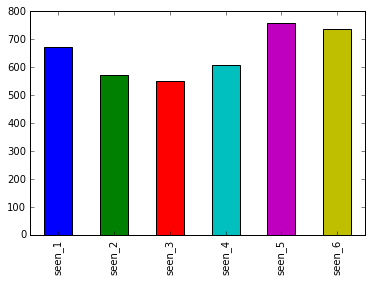

In [36]:
star_wars.iloc[:,3:9].sum(axis=0).plot.bar()

As we can see, episodes 5 and 6 are the most viewed ones, followed by episode 1.

For people who may not know Star Wars movies, episodes 4, 5 and 6 were released first, between 1977 and 1983. Episode 1, 2 and 3 where then released as prequels in 1999, 2002 and 2005 respectively.

We could then conclude that both nostalgic and curious people rushed to the cinemas when episode 1 got released, explaining its higher number of vies compared to episodes 2 and 3.

This analysis takes into account all respondents, regardless of their age or gender. We could expect answers to be different especially depending on the age of the respondents.

### Which episode has the highest ranking?

We here want to know the average ranking for each episode.

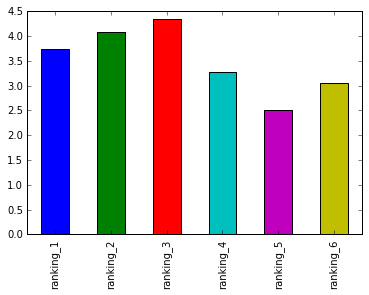

In [37]:
star_wars.iloc[:,9:15].mean(axis=0).plot.bar()

Weirdly enough, it looks like the three first episodes are ranked the highest.

Long-time fans are often disappointed by additionnal movies that drift off too much from the original spirit of the first movies, especially with such a delay between both trilogies.

However, FX techniques greatly improved between the end of the 70s and the years 2000. This resulted in much more impressive episodes and that could explain in part why the first 3 episodes are more highly ranked than the last 3.

Again, this analysis takes into account all respondents regardless of the age, education, location or gender.